In [1]:
# !pip install -U ipympl matplotlib numpy

filler

In [7]:
from google.colab import output
output.enable_custom_widget_manager()
import matplotlib.pyplot as plt

In [47]:
FOOD_STRENGTHS = {
    "red": 0.0009,
    "green": 0.0023,
    "blue": 0.0095,
    "black": 0.0250,
    "purple": 0.1050,
    "yellow": 0.1600,
    "white": 0.5,
}


def get_instant_threat_player_count_modifier(player_count):
    minimum_modifier = 125
    maximum_modifier = 250
    player_amount_for_maximum_threat_gain = 20
    gain_per_player = (
        maximum_modifier - minimum_modifier
    ) / player_amount_for_maximum_threat_gain
    m = minimum_modifier + gain_per_player * player_count
    if m > maximum_modifier:
        m = maximum_modifier
    return m



In [67]:
def legacy_evo_impact(science, player_count, flask_amount, current_evo, difficulty):
    instant_threat_player_count_modifier = get_instant_threat_player_count_modifier(
        player_count
    )
    food_value = FOOD_STRENGTHS[science] * difficulty
    threat_added = 0
    # Starting evo at 0 produces weird derivatives but whatever i guess
    evo_factor = min(current_evo, 1)
    evo = current_evo
    for _ in range(flask_amount):
        e2 = (evo_factor * 100) + 1
        diminishing_modifier = (1 / (10 ** (e2 * 0.015))) / (e2 * 0.5)
        evo_gain = food_value * diminishing_modifier
        evo = evo + evo_gain
        if evo <= 1:
            evo_factor = evo
        else:
            evo_factor = 1
        diminishing_modifier = 1 / (0.2 + (e2 * 0.016))
        threat_added = threat_added + (
            food_value * instant_threat_player_count_modifier * diminishing_modifier
        )

    return evo, threat_added

In [68]:
def new_evo_impact(science, player_count, flask_amount, current_evo, difficulty):
    instant_threat_player_count_modifier = get_instant_threat_player_count_modifier(
        player_count
    )
    food_value = FOOD_STRENGTHS[science] * difficulty
    threat_added = 0
    evo = current_evo
    food = food_value * flask_amount
    while food > 0:
        clamped_evo = min(1.0, evo)
        e2 = (clamped_evo * 100) + 1
        diminishing_modifier = (1 / (10 ** (e2 * 0.015))) / (e2 * 0.5)
        if evo >= 1:
            amount_of_food_this_iteration = food
        else:
            max_evo_gain_per_iteration = 0.01
            amount_of_food_this_iteration = min(food, max_evo_gain_per_iteration / diminishing_modifier)
        # print("amount of food", amount_of_food_this_iteration)
        evo_gain = (amount_of_food_this_iteration * diminishing_modifier)
        evo = evo + evo_gain

        diminishing_modifier = 1 / (0.2 + (e2 * 0.016))
        threat_added = threat_added + (amount_of_food_this_iteration * diminishing_modifier)
        food = food - amount_of_food_this_iteration
    # print("final evo", evo)

    return evo, threat_added

amount of food 0.00517571083339672
amount of food 0.010715193052376065
amount of food 0.016637622228936014
amount of food 0.022963072429937656
amount of food 0.02971255568592546
amount of food 0.03690806312437145
amount of food 0.044572607835583165
amount of food 0.052730269542256285
amount of food 0.050584905267217185
final evo 0.08823774657473869
amount of food 0.06896123270605815
amount of food 0.07865120236636446
amount of food 0.0889370599013837
amount of food 0.09984872005310863
amount of food 0.1114174641964622
amount of food 0.12367599944831695
amount of food 0.13665852024319922
amount of food 0.15040077247604922
amount of food 0.16494012031641705
amount of food 0.12650890829264025
final evo 0.18525371730636453
amount of food 0.19162399545064596
amount of food 0.20851706894892122
amount of food 0.22636081061069452
amount of food 0.24520117504336364
amount of food 0.2650861726948242
amount of food 0.28606595759420045
amount of food 0.3081929187204695
amount of food 0.33152177514

amount of food 0.00517571083339672
amount of food 0.010715193052376065
amount of food 0.016637622228936014
amount of food 0.022963072429937656
amount of food 0.02971255568592546
amount of food 0.004795845769428094
final evo 0.05129940326406922
amount of food 0.03787698099279884
amount of food 0.04560421708142774
amount of food 0.053827779800866664
amount of food 0.06257301021821905
amount of food 0.07186641753116442
amount of food 0.08173572987373215
amount of food 0.0922099472503163
amount of food 0.0143059172514748
final evo 0.12268403361524347
amount of food 0.10490947662778674
amount of food 0.030090523372213268
final evo 0.13526070069418739
amount of food 0.11995246860473452
amount of food 0.13271579018597773
amount of food 0.14622803539046741
amount of food 0.0611037058188203
final evo 0.16906716666031493
amount of food 0.09
final evo 0.17448288155431413
amount of food 0.1744417360716889
amount of food 0.19036000488508067
amount of food 0.0951982590432304
final evo 0.199077799104

 0.784098181972482
amount of food 6.16582904230578
amount of food 6.462883947871184
amount of food 6.7732025339677095
amount of food 7.097350175084509
amount of food 7.43591560240732
amount of food 7.789511847206742
amount of food 8.158777221687046
amount of food 8.544376338763332
amount of food 8.947001172291884
amount of food 9.367372159337364
amount of food 9.806239346122238
amount of food 10.264383579367143
amount of food 3.1871570335877664
final evo 0.9070650166019013
difficulty red=200 green=400 black=300 purple=400 yellow=400 white=200
/calc-send evo=0.0 difficulty=100.0 players=6 color=red count=200 color=green count=400 color=black count=300 color=purple count=400 color=yellow count=400 color=white count=200
legacy_evos=[0.06823945155672531, 0.16170179150669295, 0.3637343208271917, 0.6308114246582338, 0.7794015714577754, 0.9024103822548366]
current_evos=[0.07252514825451502, 0.16629166669714016, 0.36833452888547813, 0.6354197467535205, 0.784098181972482, 0.9070650166019013]
am

amount of food 0.00517571083339672
amount of food 0.010715193052376065
amount of food 0.016637622228936014
amount of food 0.022963072429937656
amount of food 0.02971255568592546
amount of food 0.03690806312437145
amount of food 0.044572607835583165
amount of food 0.052730269542256285
amount of food 0.0614062411465016
amount of food 0.07062687723113772
amount of food 0.0804197445951195
amount of food 0.09081367490617247
amount of food 0.10183881955702968
amount of food 0.11352670681512508
amount of food 0.125910301359192
amount of food 0.036042539656939016
final evo 0.1525925395952076
amount of food 0.14254744197034888
amount of food 0.1566321224525755
amount of food 0.1715306932308203
amount of food 0.18728296385764698
amount of food 0.20393053674185438
amount of food 0.22151688399450373
amount of food 0.24008742746189082
amount of food 0.2596896220745528
amount of food 0.28037304264653573
amount of food 0.30218947426448867
amount of food 0.3251930064116993
amount of food 0.34944013097

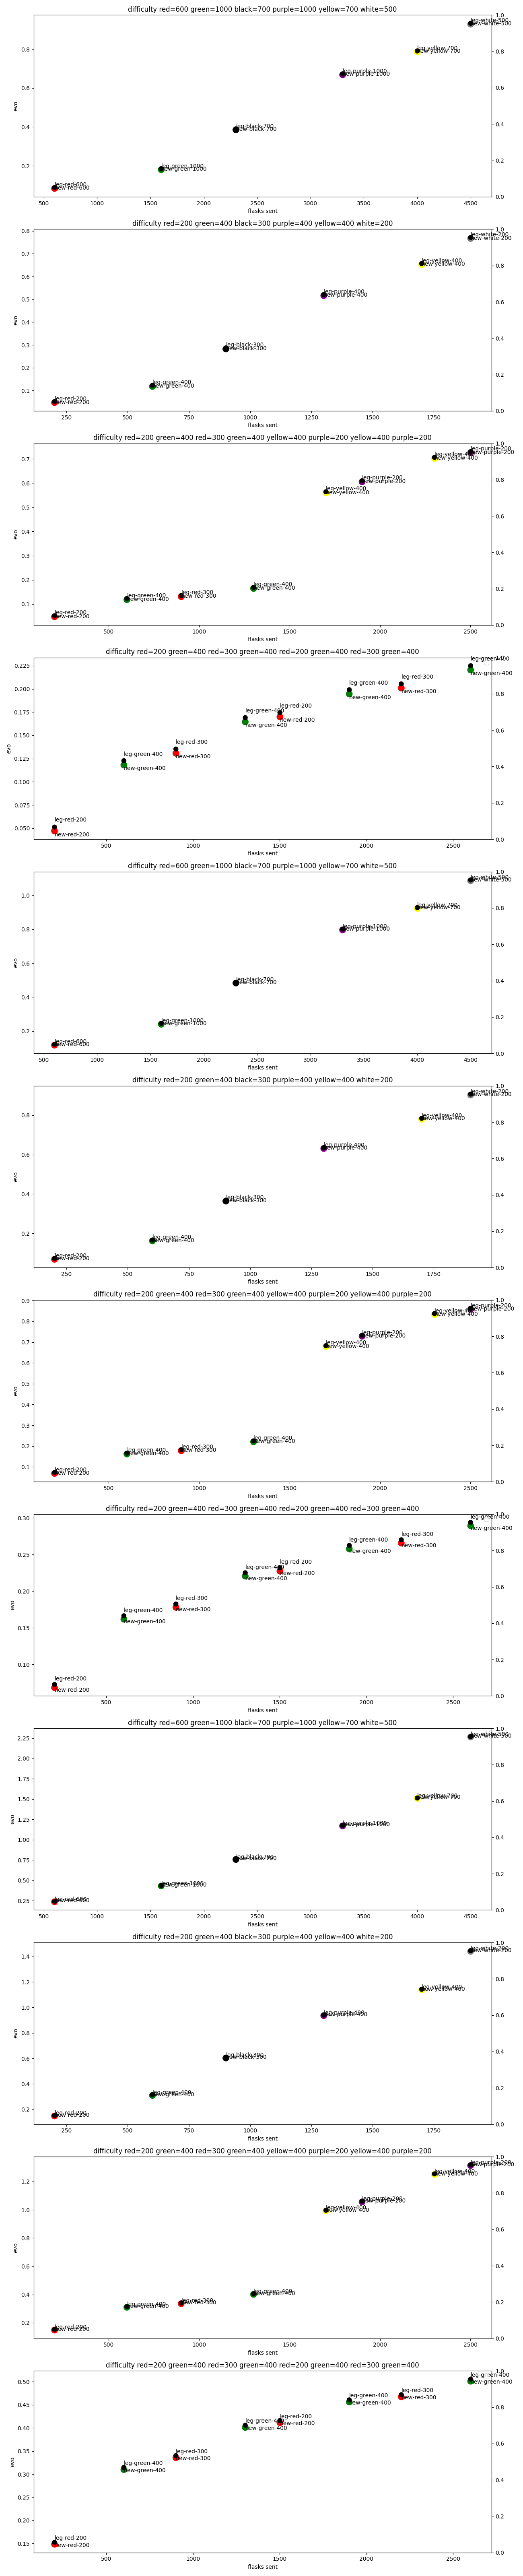

In [69]:
torun = [
    (
        ("red", 600),
        ("green", 1000),
        ("black", 700),
        ("purple", 1000),
        ("yellow", 700),
        ("white", 500),
    ),
    (
        ("red", 200),
        ("green", 400),
        ("black", 300),
        ("purple", 400),
        ("yellow", 400),
        ("white", 200),

    ),
    (
        ("red", 200),
        ("green", 400),
        ("red", 300),
        ("green", 400),
        ("yellow", 400),
        ("purple", 200),
        ("yellow", 400),
        ("purple", 200),
    ),
    (
        ("red", 200),
        ("green", 400),
        ("red", 300),
        ("green", 400),
        ("red", 200),
        ("green", 400),
        ("red", 300),
        ("green", 400),
    )


]
difficulties = {
    "itytd": 0.25,
    "poc": 0.5,
    "easy": 0.75,
    "normal": 1.0,
    "hard": 1.5,
    "nightmare": 3,
    "fnf": 5,
}

difficulties_to_eval = ["poc", "normal", "fnf"]
fig, axs = plt.subplots(nrows=len(torun)*len(difficulties_to_eval), ncols=1, figsize=(13, 16*len(torun)))


player_count = 6
plot_count = 0
for difficulty_name in difficulties_to_eval:
    difficulty = difficulties[difficulty_name]
    for run_schema in torun:
        if len(torun) == 1:
            ax = axs
        else:
            ax = axs[plot_count]
        ax2 = ax.twinx()
        ax2.patch.set_alpha(0.0)

        prev_new_x_idx = 0
        total_flasks_sent = 1
        current_legacy_evo, current_new_evo = 0, 0
        flask_totals = []
        legacy_evos = []
        legacy_colors = []
        current_evos = []
        current_colors = []
        for science_name, science_count in run_schema:
            label = f"{science_name}-{science_count}"
            current_legacy_evo, legacy_threat_added = legacy_evo_impact(
                science_name, player_count, science_count, current_legacy_evo, difficulty
            )
            current_new_evo, new_threat_added = new_evo_impact(
                science_name, player_count, science_count, current_new_evo, difficulty
            )
            color = science_name

            if science_name == "white":
                color = "grey"
            flask_totals.append(total_flasks_sent+science_count)
            legacy_evos.append(current_legacy_evo)
            legacy_colors.append(color)
            current_evos.append(current_new_evo)
            current_colors.append("black")
            ax.text(total_flasks_sent+science_count, current_legacy_evo +0.01, f"leg-{label}")
            ax.text(total_flasks_sent+science_count, current_new_evo -0.01, f"new-{label}")
            total_flasks_sent += science_count
        title = "difficulty " + " ".join(f"{k}={v}" for k, v in run_schema)
        print(title)
        # cliff notation
        print(f"/calc-send evo=0.0 difficulty={difficulty*100} players={player_count} " + " ".join(f"color={k} count={v}" for k, v in run_schema))
        ax.set_title(title)

        ax.scatter(flask_totals, legacy_evos, color=legacy_colors,  linewidth=6)
        ax.scatter(flask_totals, current_evos, color=current_colors, linewidth=3)
        print(f"{legacy_evos=}")
        print(f"{current_evos=}")

        ax.set_ylabel("evo")
        ax.set_xlabel("flasks sent")
        # ax2.set_ylabel("threat added", color="tab:red")
        plot_count += 1

    ax.legend()
plt.tight_layout()
plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support: